<a href="https://colab.research.google.com/github/fighaz/PCVK_2024/blob/main/Week7PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.

2. Berikut merupakan langkah-langkah yang dapat dilakukan:

a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan
pada akun github seperti pada modul sebelumnya.

b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im
import cv2 as cv
import math
from google.colab.patches import cv2_imshow

d. Load citra yang akan diproses dan ubah menjadi citra keabuan

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

f.Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
print(kernel.shape)
print(img.shape[0]-1)

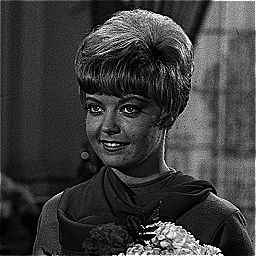

In [ ]:

def conv(img, kernel,stride,padding):
    img_padded = np.pad(img, ((padding, padding), (padding, padding)), mode='constant', constant_values=0)

    output_height = (img.shape[0] + 2 * padding - kernel.shape[0]) // stride + 1
    output_width = (img.shape[1] + 2 * padding - kernel.shape[1]) // stride + 1

    img_conv = np.zeros((output_height, output_width), dtype=np.float32)

    for i in range(0, output_height):
      for j in range(0, output_width):
            img_conv[i, j] = np.sum(img_padded[i*stride:i*stride+kernel.shape[0],
                                                j*stride:j*stride+kernel.shape[1]] * kernel)

    return img_conv

img_conv = conv(img, kernel,1,1)
cv2_imshow(img_conv)

Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut:

In [ ]:
sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
emboss = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
left_sobel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
canny_edge = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
prewit_edge = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
gaussian_blurr=1/256 * np.array([
        [ 1,  4,  6,  4,  1],
        [ 4, 16, 24, 16,  4],
        [ 6, 24, 36, 24,  6],
        [ 4, 16, 24, 16,  4],
        [ 1,  4,  6,  4,  1],
           ])


Sharpen


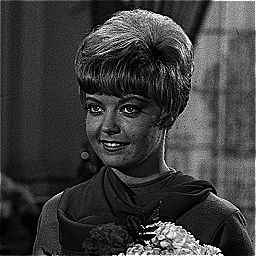

Emboss


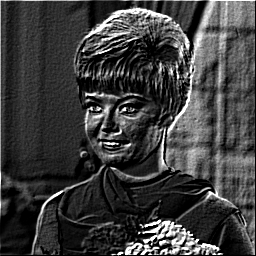

Left Sobel


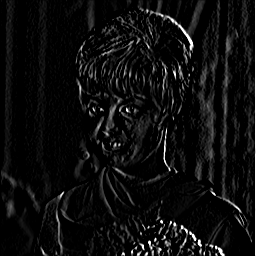

Canny Edge


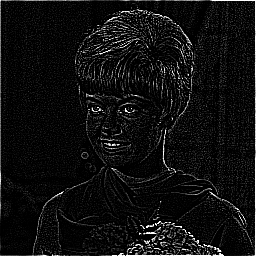

Prewit Edge


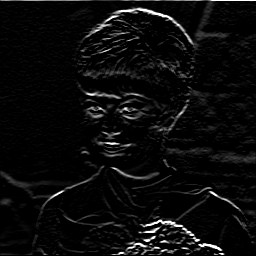

Gaussian Blurr 5*5


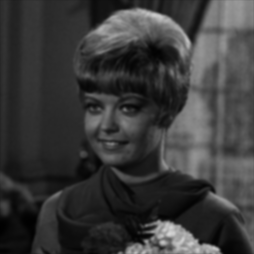

In [ ]:
img_sharpen = conv(img, sharpen,1,1)
print('Sharpen')
cv2_imshow(img_sharpen)

img_emboss = conv(img, emboss,1,1)
print('Emboss')
cv2_imshow(img_emboss)

img_left_sobel = conv(img, left_sobel,1,1)
print('Left Sobel')
cv2_imshow(img_left_sobel)

img_canny_edge = conv(img, canny_edge,1,1)
print('Canny Edge')
cv2_imshow(img_canny_edge)

img_prewit_edge = conv(img, prewit_edge,1,1)
print('Prewit Edge')
cv2_imshow(img_prewit_edge)

gaussian_blurr = conv(img, gaussian_blurr,1,1)
print('Gaussian Blurr 5*5')
cv2_imshow(gaussian_blurr)

Gaussian 21 * 21


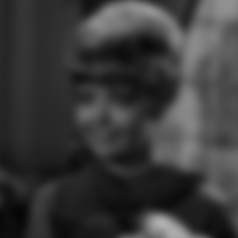

In [ ]:
sigma=math.sqrt(21)
gaussian_kernel =cv.getGaussianKernel(21, sigma)
gauss_kernel = gaussian_kernel@ gaussian_kernel.transpose()
img_gauss = conv(img, gauss_kernel,1,1)
print('Gaussian 21 * 21')
cv2_imshow(img_gauss)

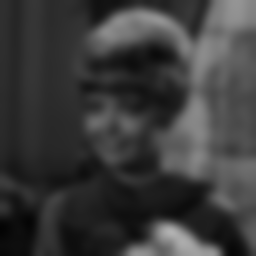

In [ ]:
# Menerapkan Gaussian Kernel pada gambar
filtered_image = cv.filter2D(img, -1, gauss_kernel)
cv2_imshow(filtered_image)